In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
# Load MNIST dataset
mnist = datasets.load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# SVM classifier with One-vs-All (OvA) strategy
svm_classifier = SVC(decision_function_shape='ovr', kernel='linear')

# Define hyperparameter grid for random search
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Check for the indecision region
decision_function_values = random_search.decision_function(X_test)
print("decision_function_values" ,decision_function_values)
min_decision_value = np.min(decision_function_values)
max_decision_value = np.max(decision_function_values)
print("\nMinimum Decision Value:", min_decision_value)
print("Maximum Decision Value:", max_decision_value)


Best Hyperparameters: {'gamma': 1, 'C': 1}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.9777777777777777
decision_function_values [[ 4.90850595  6.24367704  0.70940145 ...  2.71738602  7.30874277
   1.70831963]
 [ 3.77967662  2.69470111  0.69884445 .

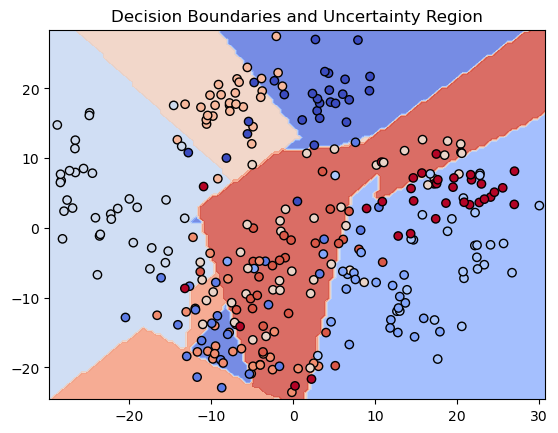

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to plot decision boundaries and uncertainty region
def plot_decision_boundaries(X, y, model, title):
    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Set step size in the mesh
    h = 0.5
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use random samples for plotting
    random_indices = np.random.choice(X_pca.shape[0], 300, replace=False)
    mesh_predictions = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(mesh_predictions)

    # Reshape predictions to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot random samples
    plt.scatter(X_pca[random_indices, 0], X_pca[random_indices, 1], c=y[random_indices], cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    
    # Set plot title
    plt.title(title)
    
    # Show the plot
    plt.show()

# Assuming that 'random_search' is your trained SVM model
best_model = random_search.best_estimator_

# Plot decision boundaries for uncertainty region
plot_decision_boundaries(X_test, y_test, best_model, "Decision Boundaries and Uncertainty Region")
